In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv(r"C:\Users\Vinod Reddy\Documents\Datasets\EDA\Algerian_forest_fires_dataset_UPDATE.csv",header=1)
df=data.copy()
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [4]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [5]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [6]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [7]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [8]:
df.shape

(244, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [10]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [11]:
df.nunique()

day             32
month            5
year             2
Temperature     20
 RH             63
 Ws             19
Rain            40
FFMC           174
DMC            166
DC             198
ISI            107
BUI            174
FWI            127
Classes          9
Region           2
dtype: int64

In [12]:
df.loc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0


In [13]:
df.drop(122,inplace=True)
df.reset_index(inplace=True,drop=True)

In [14]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [15]:
df.columns=df.columns.str.strip()

In [16]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [17]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws','Region']]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws','Region']].astype(int)

In [18]:
objects=[i for i in df.columns if(df[i].dtype=='O')]

In [19]:
for i in objects:
    if(i!='Classes'):
        df[i]=df[i].astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [21]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [22]:
df["Classes"].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [23]:
df["Classes"].value_counts().index

Index(['fire   ', 'not fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '],
      dtype='object')

In [24]:
df["Classes"]=df["Classes"].str.strip()

In [25]:
df["Classes"].value_counts().index

Index(['fire', 'not fire'], dtype='object')

In [26]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [27]:
fire=df["Classes"].value_counts()
fire

fire        137
not fire    106
Name: Classes, dtype: int64

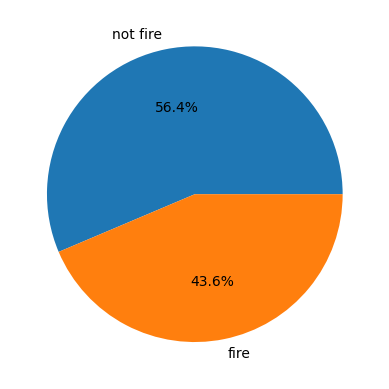

In [28]:
plt.pie(fire.values,autopct="%1.1f%%",labels=df["Classes"].unique())
plt.show()

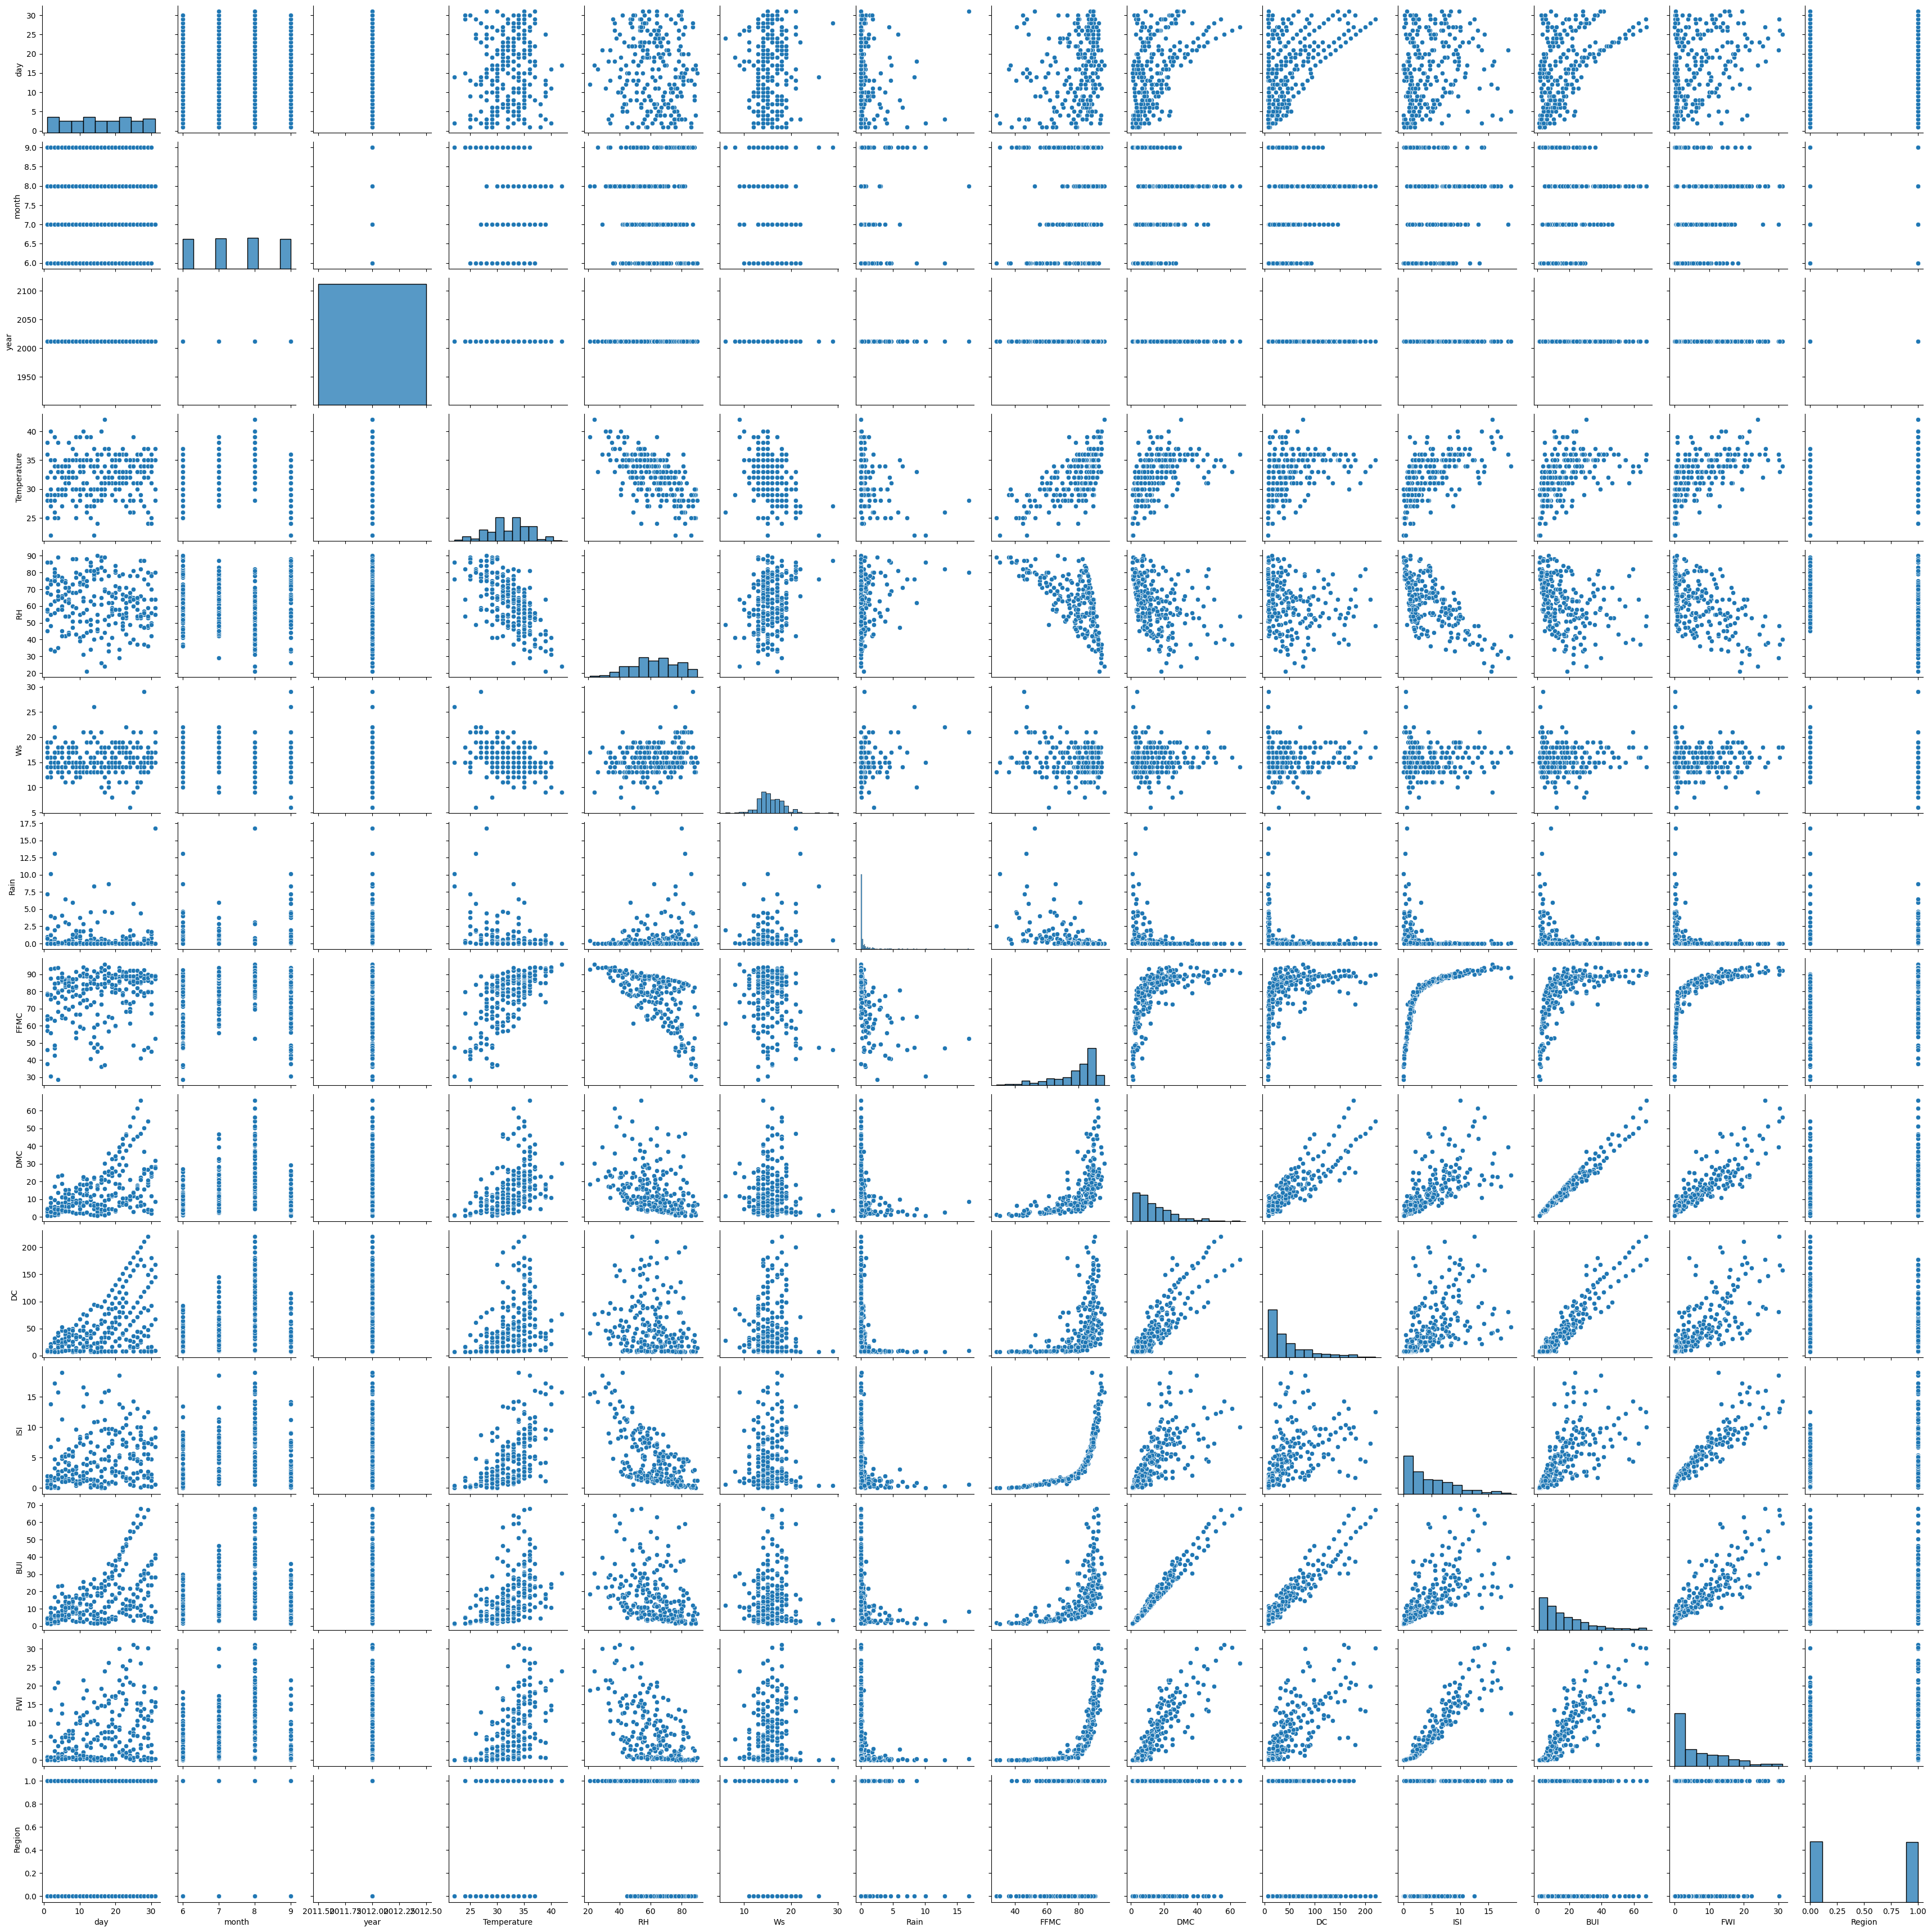

In [29]:
sns.pairplot(data=df)

array([[<AxesSubplot: title={'center': 'day'}>,
        <AxesSubplot: title={'center': 'month'}>,
        <AxesSubplot: title={'center': 'year'}>,
        <AxesSubplot: title={'center': 'Temperature'}>],
       [<AxesSubplot: title={'center': 'RH'}>,
        <AxesSubplot: title={'center': 'Ws'}>,
        <AxesSubplot: title={'center': 'Rain'}>,
        <AxesSubplot: title={'center': 'FFMC'}>],
       [<AxesSubplot: title={'center': 'DMC'}>,
        <AxesSubplot: title={'center': 'DC'}>,
        <AxesSubplot: title={'center': 'ISI'}>,
        <AxesSubplot: title={'center': 'BUI'}>],
       [<AxesSubplot: title={'center': 'FWI'}>,
        <AxesSubplot: title={'center': 'Region'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

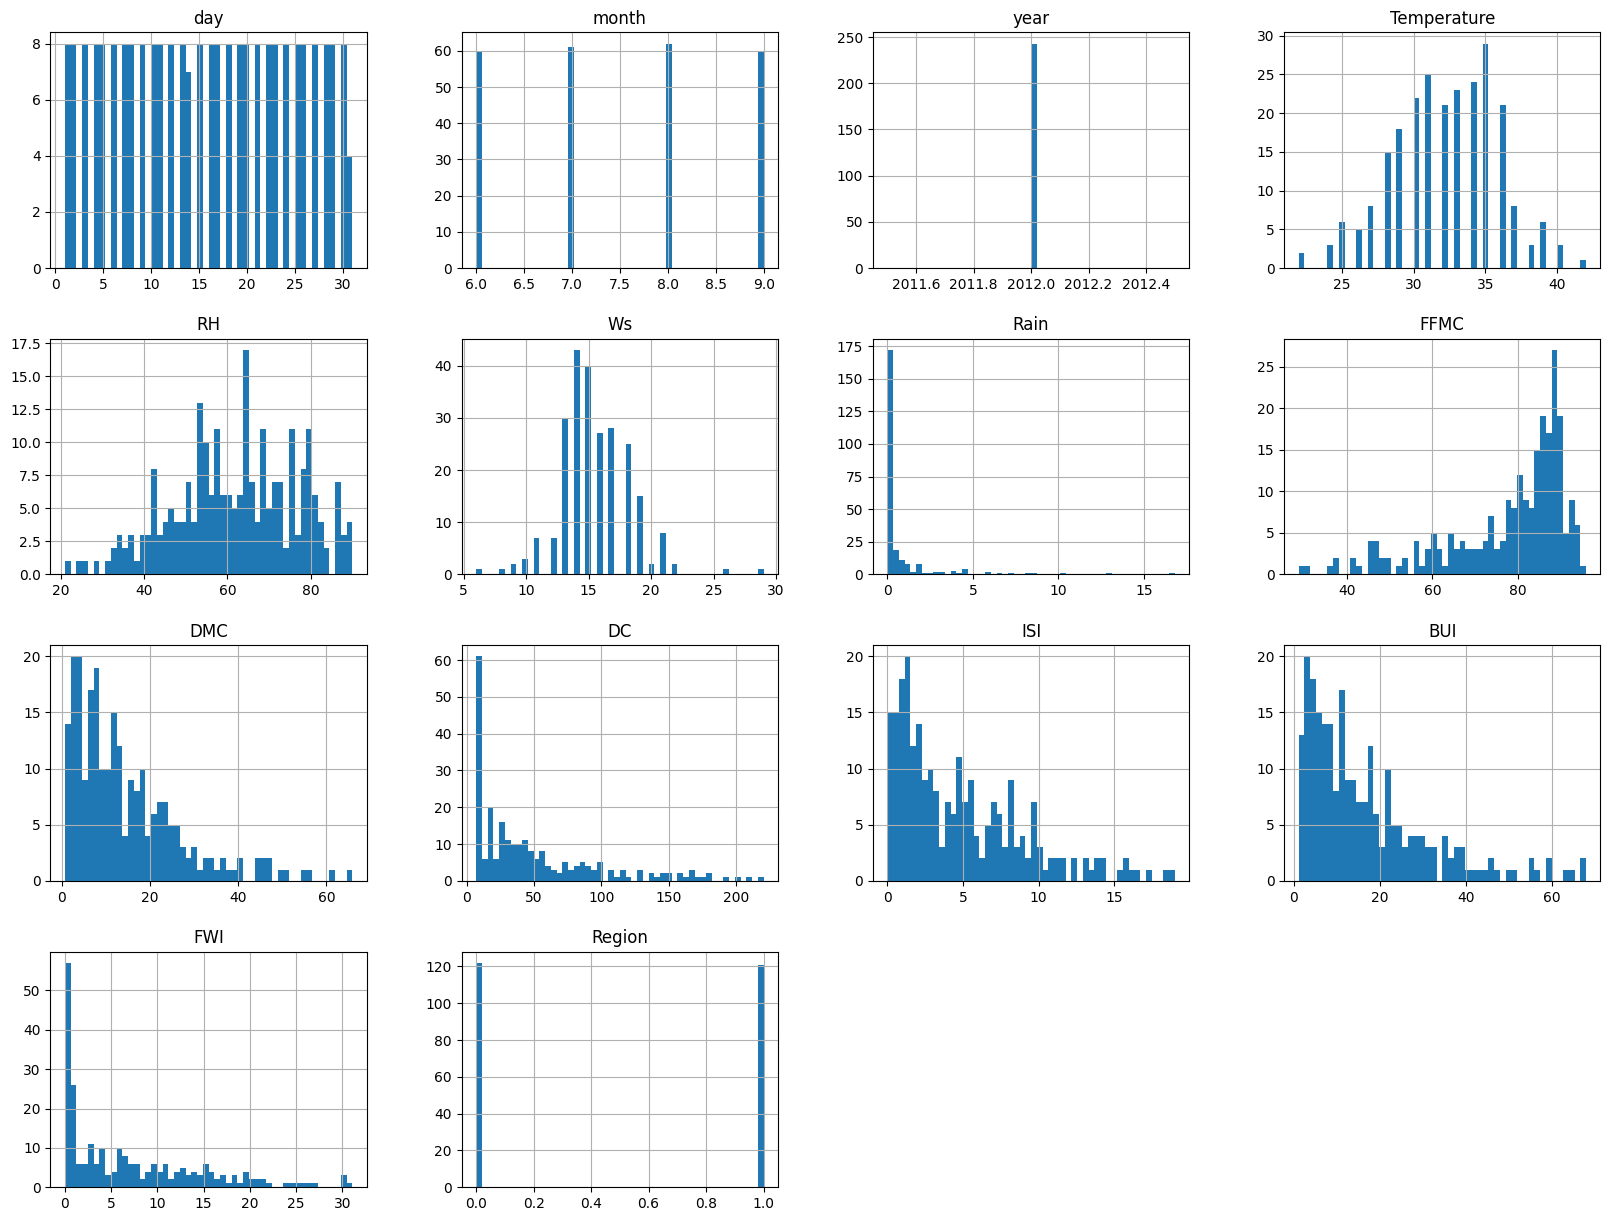

In [30]:
df.hist(bins=50,figsize=(20,15))

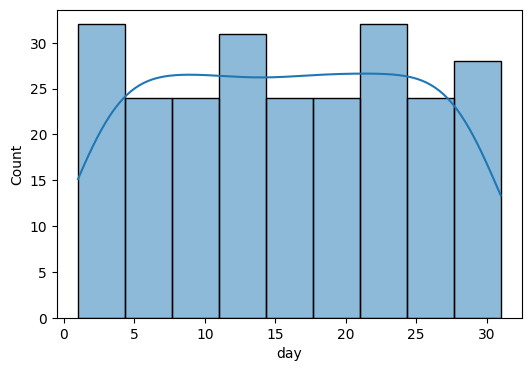

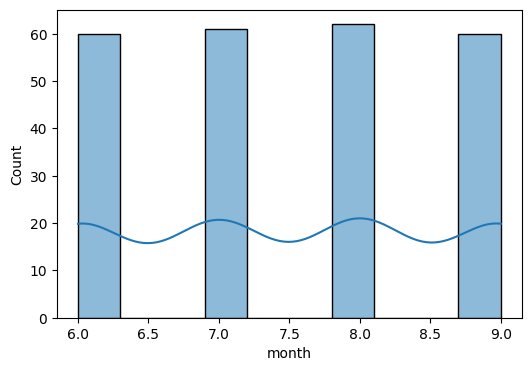

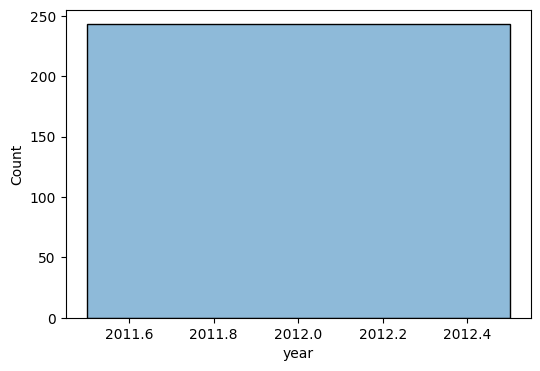

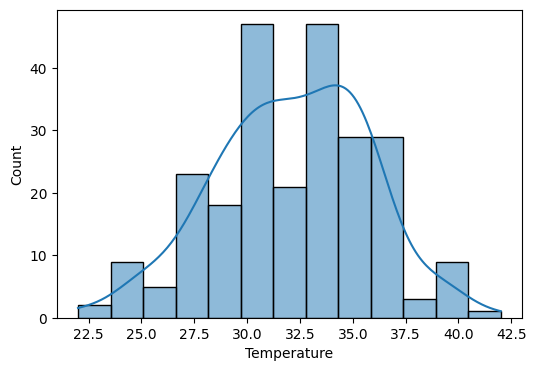

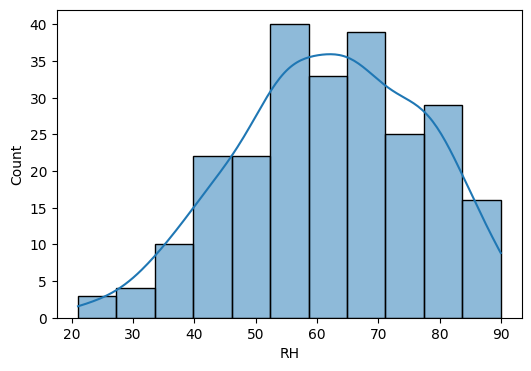

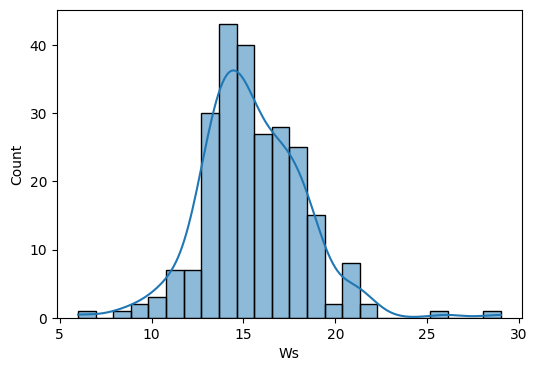

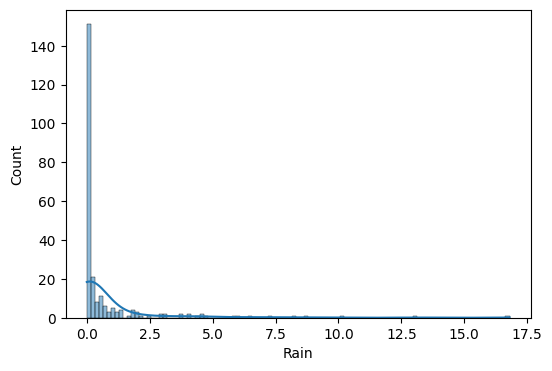

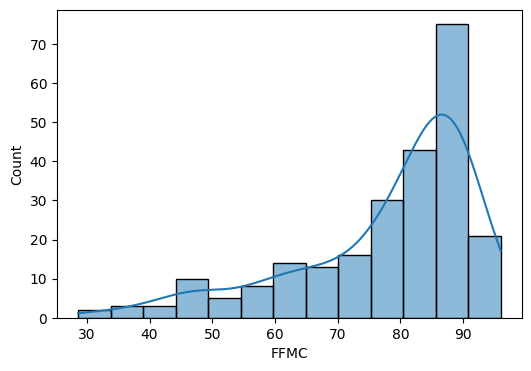

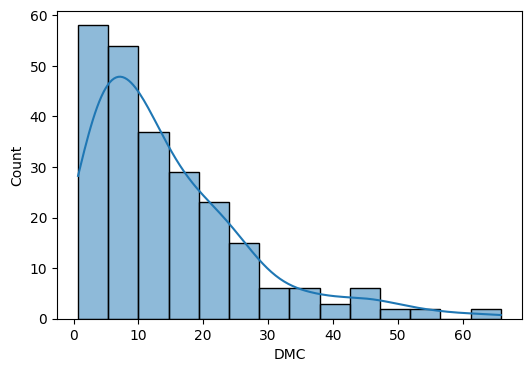

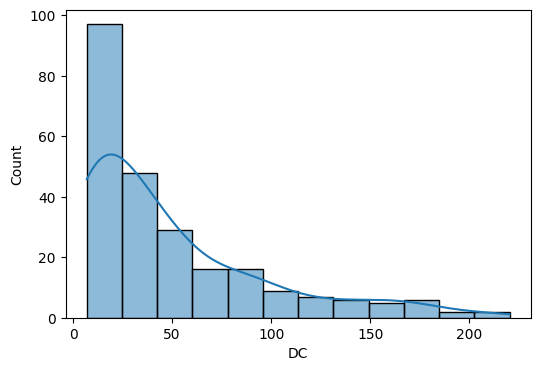

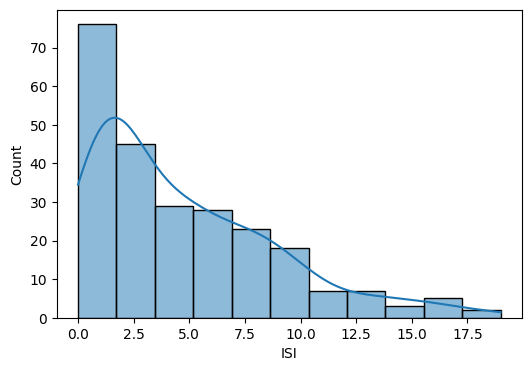

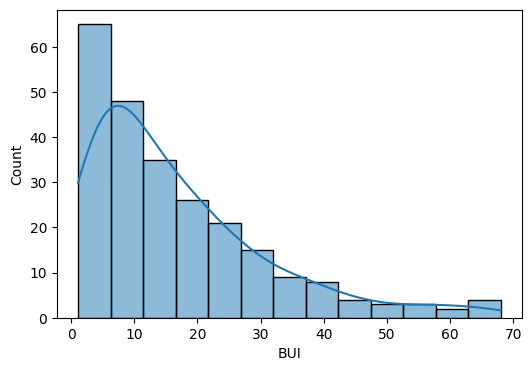

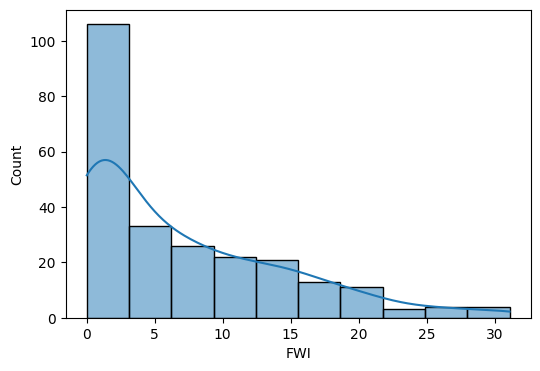

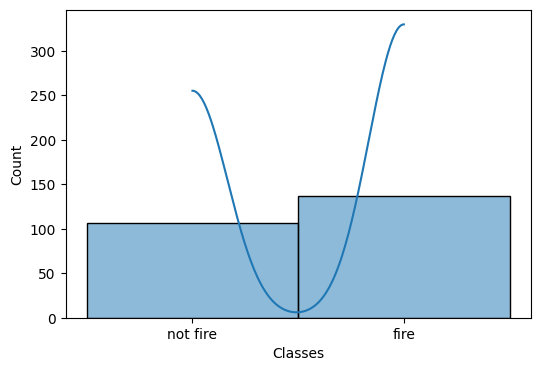

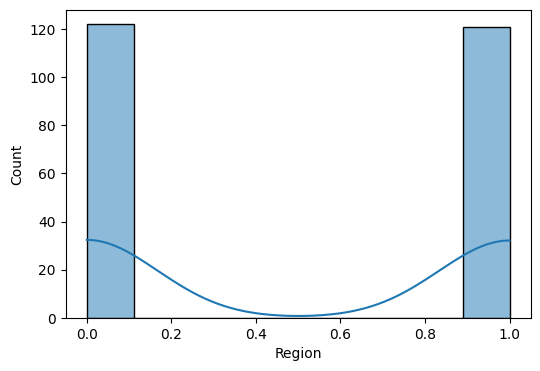

In [31]:
for column in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[column],kde=True)

<AxesSubplot: xlabel='month', ylabel='count'>

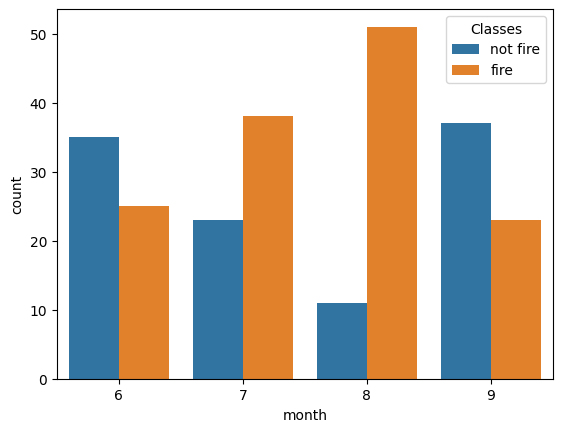

In [32]:
sns.countplot(data=df,x="month",hue="Classes")

In [36]:
# sns.heatmap(df.corr(),annot=True)
import warnings
warnings.filterwarnings("ignore")
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.078734


<AxesSubplot: xlabel='year', ylabel='count'>

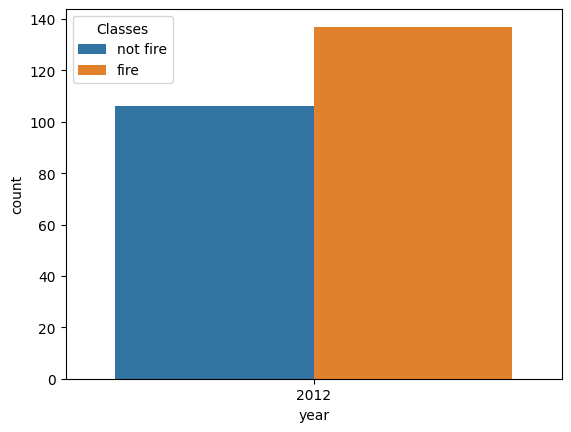

In [37]:
sns.countplot(data=df,x="year",hue="Classes")

In [40]:
import numpy as np
df["Classes"]=np.where(df["Classes"].str.contains("not fire"),0,1)

In [41]:
df1=df.drop(["day","year","month"],axis=1)

In [42]:
df1

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int32  
 1   RH           243 non-null    int32  
 2   Ws           243 non-null    int32  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int32  
 11  Region       243 non-null    int32  
dtypes: float64(7), int32(5)
memory usage: 18.2 KB


In [44]:
x=df1.drop('FWI',axis=1)
y=df1["FWI"]

In [45]:
x.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.586639,0.089408
Classes,0.516015,-0.432161,-0.069964,-0.379097,0.769492,0.585658,0.511123,0.735197,0.586639,1.000000,0.162347


In [46]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_mat=dataset.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if(abs(corr_mat.iloc[i,j])>threshold):
                colname=corr_mat.columns[i]
                col_corr.add(colname)
    return col_corr

In [47]:
cols=correlation(x,0.87)
cols

{'BUI', 'DC'}

In [48]:
x.drop(cols,axis=1,inplace=True)

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [71]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)

<AxesSubplot: >

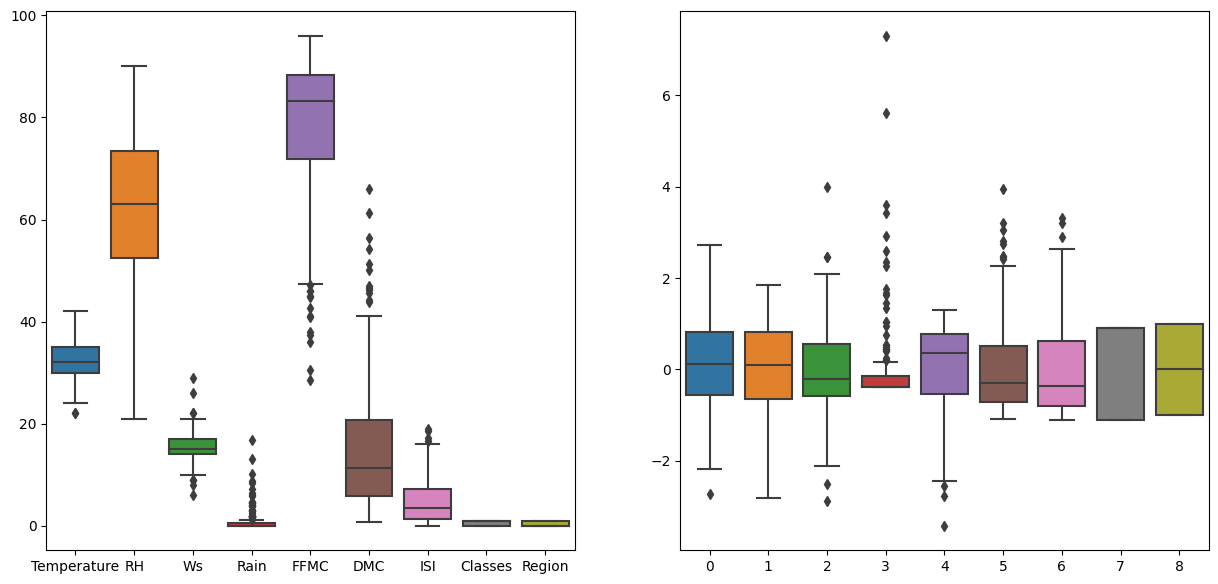

In [72]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.boxplot(data=x)
plt.subplot(122)
sns.boxplot(x_train_scaled)


In [73]:
x_test_scaled=scaler.transform(x_test)

# Linear Reggression

score is  0.9839004057095255
MAE 0.5648036371485072


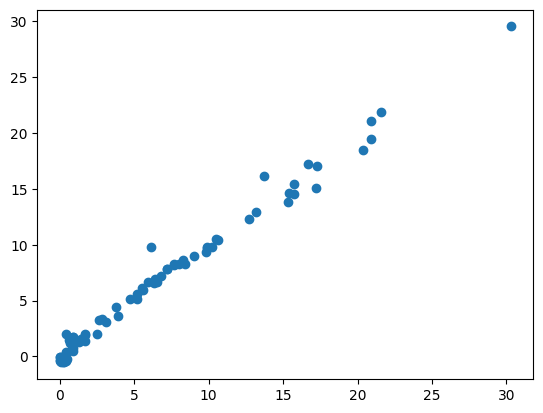

In [78]:
from sklearn.metrics import mean_absolute_error,r2_score
regressor=LinearRegression()
regressor.fit(x_train_scaled,y_train)
y_pred=regressor.predict(x_test_scaled)
print("score is ",r2_score(y_pred,y_test))
print("MAE",mean_absolute_error(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.show()

score is  0.9298380301537672
MAE 1.1203368882393199


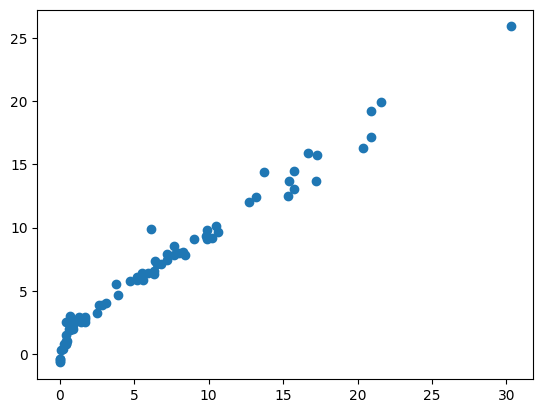

In [80]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred=lasso.predict(x_test_scaled)
print("score is ",r2_score(y_pred,y_test))
print("MAE",mean_absolute_error(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.show()

In [81]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)

LassoCV(cv=5)

In [82]:
lassocv.alpha_

0.06177603120682054

In [83]:
lassocv.mse_path_

array([[50.65386968, 76.54197718, 42.60540011, 85.19903601, 37.22447771],
       [44.75111814, 74.82132255, 38.341692  , 85.19903601, 33.05643554],
       [39.36934038, 67.35349762, 32.91718118, 77.16947646, 28.98441557],
       [34.66809152, 60.76849885, 28.30179163, 70.00628728, 25.07891899],
       [30.56005987, 54.39656706, 24.38332378, 63.69553448, 21.70030699],
       [26.96916466, 47.86216351, 21.06462063, 58.13161794, 18.77862509],
       [23.82945553, 42.15575307, 18.26138649, 53.22232605, 16.25301222],
       [21.08318369, 37.17090521, 15.90095328, 46.89293347, 14.07124316],
       [18.68014904, 32.81473426, 13.92043855, 41.32635877, 12.18732916],
       [16.57661964, 29.00744813, 12.26540003, 36.4658746 , 10.56155236],
       [14.73438066, 25.67846082, 10.88893934, 32.22081976,  9.15943046],
       [13.12047322, 22.76665973,  9.75047302, 28.5122238 ,  7.95103045],
       [11.70583482, 20.21881242,  8.81511714, 25.27132199,  6.9102242 ],
       [10.46524798, 17.98854548,  8.0

In [84]:
lassocv.alphas_

array([7.1027424 , 6.62404134, 6.17760312, 5.76125335, 5.37296415,
       5.01084435, 4.67313021, 4.35817688, 4.06445034, 3.79051999,
       3.53505163, 3.29680098, 3.07460763, 2.86738937, 2.67413692,
       2.49390904, 2.32582792, 2.1690749 , 2.02288651, 1.88655073,
       1.75940353, 1.64082562, 1.53023946, 1.42710644, 1.33092425,
       1.24122441, 1.15757004, 1.07955369, 1.00679538, 0.93894074,
       0.87565928, 0.81664278, 0.76160379, 0.71027424, 0.66240413,
       0.61776031, 0.57612533, 0.53729642, 0.50108444, 0.46731302,
       0.43581769, 0.40644503, 0.379052  , 0.35350516, 0.3296801 ,
       0.30746076, 0.28673894, 0.26741369, 0.2493909 , 0.23258279,
       0.21690749, 0.20228865, 0.18865507, 0.17594035, 0.16408256,
       0.15302395, 0.14271064, 0.13309242, 0.12412244, 0.115757  ,
       0.10795537, 0.10067954, 0.09389407, 0.08756593, 0.08166428,
       0.07616038, 0.07102742, 0.06624041, 0.06177603, 0.05761253,
       0.05372964, 0.05010844, 0.0467313 , 0.04358177, 0.04064

score is  0.9808921129263425
MAE 0.635601574451742


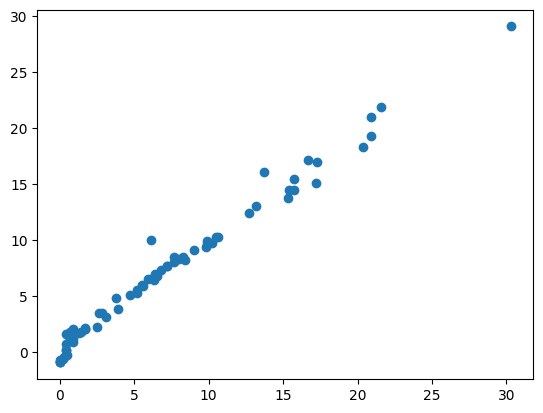

In [85]:
y_pred=lassocv.predict(x_test_scaled)
print("score is ",r2_score(y_pred,y_test))
print("MAE",mean_absolute_error(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.show()

score is  0.9838354829195293
MAE 0.5663304128816937


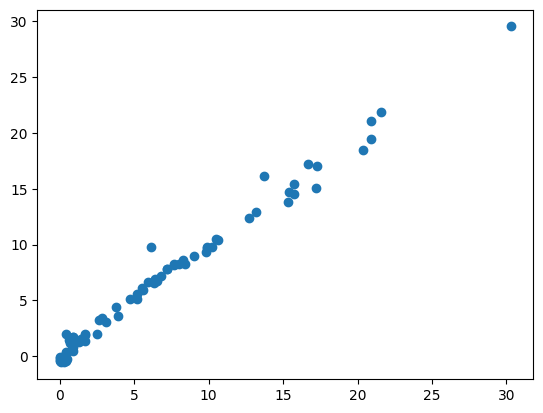

In [95]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)
ridge.fit(x_train_scaled,y_train)
y_pred=ridge.predict(x_test_scaled)
print("score is ",r2_score(y_pred,y_test))
print("MAE",mean_absolute_error(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.show()

In [89]:
ridge.alpha

1.0

score is  0.973475588252513
MAE 0.7943132619521893


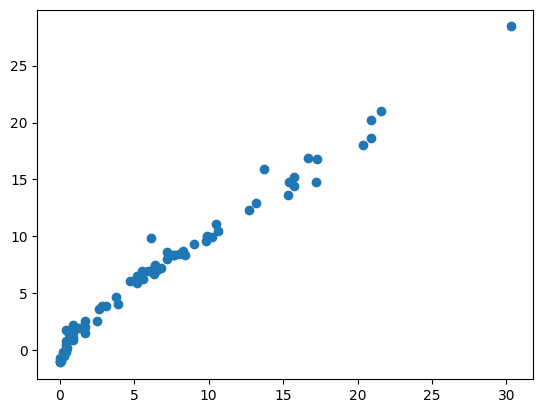

In [96]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)
y_pred=ridgecv.predict(x_test_scaled)
print("score is ",r2_score(y_pred,y_test))
print("MAE",mean_absolute_error(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.show()

score is  0.7943816956032856
MAE 1.8554687479717549


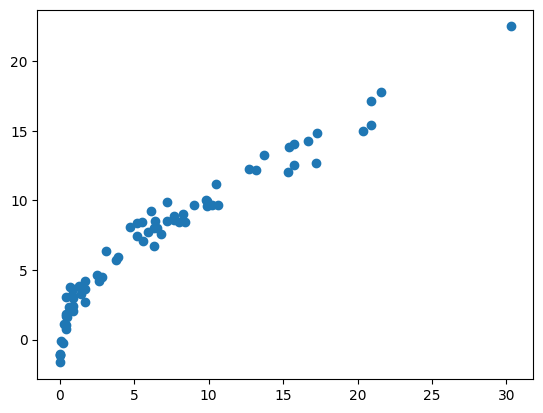

In [97]:
from sklearn.linear_model import ElasticNet
elas=ElasticNet()
elas.fit(x_train_scaled,y_train)
y_pred=elas.predict(x_test_scaled)
print("score is ",r2_score(y_pred,y_test))
print("MAE",mean_absolute_error(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.show()

score is  0.9790305445425309
MAE 0.6856401038998683


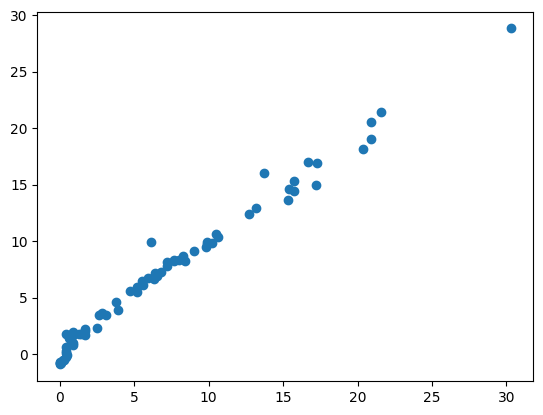

In [98]:
from sklearn.linear_model import ElasticNetCV
elascv=ElasticNetCV()
elascv.fit(x_train_scaled,y_train)
y_pred=elascv.predict(x_test_scaled)
print("score is ",r2_score(y_pred,y_test))
print("MAE",mean_absolute_error(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.show()

In [99]:
import pickle
pickle.dump(scaler,open("scaler.pkl","wb"))
pickle.dump(ridge,open("ridge.pkl","wb"))